# BFM Project 
## COVID-19: Forecasting using Regression Analysis
### Submitted by - 
#### Varun Kumar Kashyap - 502304212
#### Danish Madaan - 502304224

# Visual Analysis 

# Step 1  - Data Collection 

In [30]:
import pandas as pd


file_path = '/Users/varunkashyap/Downloads/Covid 19 data.xlsx'
covid_data = pd.read_excel(file_path)

# Displaying the first few rows of the dataset-
print(covid_data.head())

         date  year  month  day    cases  deaths countriesAndTerritories  \
0  23/10/2022  2022     10   23   3557.0     0.0                 Austria   
1  22/10/2022  2022     10   22   5494.0     4.0                 Austria   
2  21/10/2022  2022     10   21   7776.0     4.0                 Austria   
3  20/10/2022  2022     10   20   8221.0     6.0                 Austria   
4  19/10/2022  2022     10   19  10007.0     8.0                 Austria   

  geoId  popData2020 countryterritoryCode continentExp  
0    AT      8901064                  AUT       Europe  
1    AT      8901064                  AUT       Europe  
2    AT      8901064                  AUT       Europe  
3    AT      8901064                  AUT       Europe  
4    AT      8901064                  AUT       Europe  


# Step 2 - Data Pre Processing 

In [36]:
# Handling the missing values and duplicates
covid_data.dropna(inplace=True)
covid_data.drop_duplicates(inplace=True)

In [37]:
# Converting the 'Date' column to datetime format
covid_data['date'] = pd.to_datetime(covid_data['date'],dayfirst = True)

# Step 3 - Data Visualization 

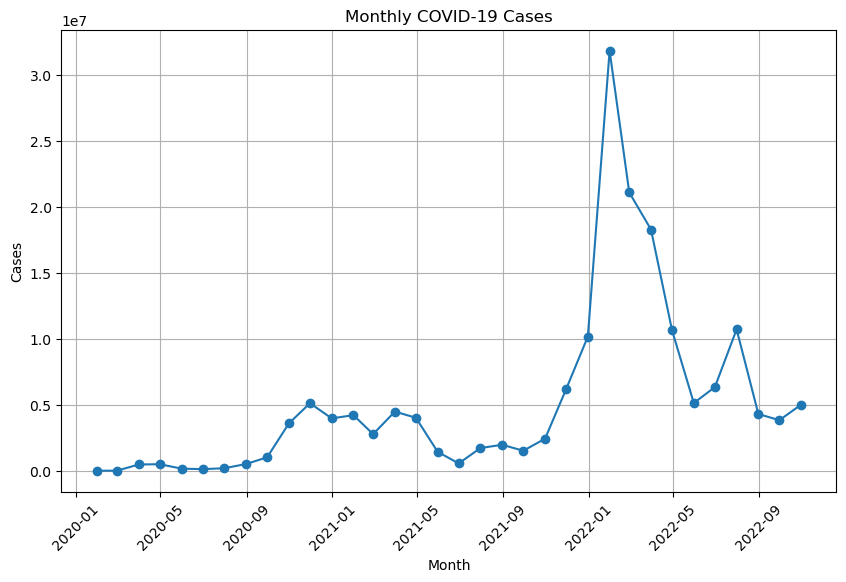

In [53]:
import matplotlib.pyplot as plt 
# Plot monthly COVID-19 cases
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['cases'], marker='o')
plt.title('Monthly COVID-19 Cases')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

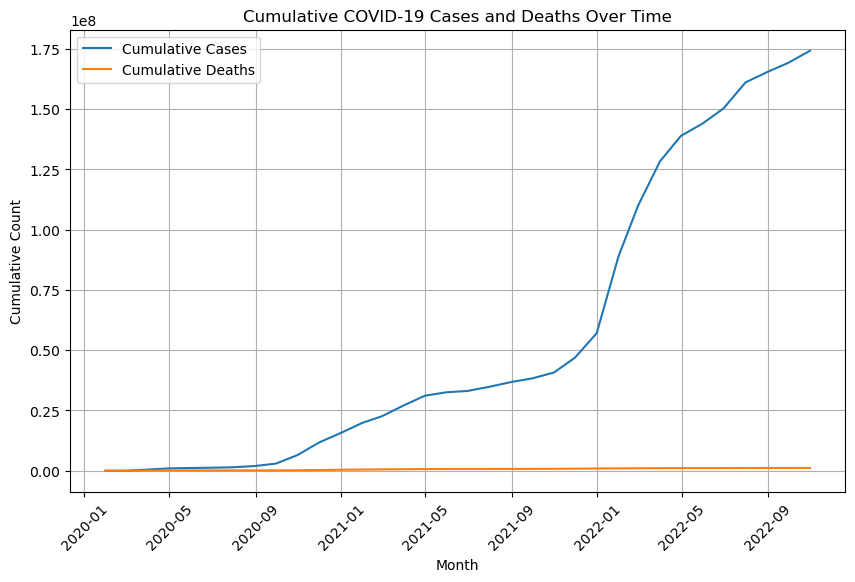

In [55]:
# Cumulative cases and deaths over time-
monthly_data['Cumulative Cases'] = monthly_data['cases'].cumsum()
monthly_data['Cumulative Deaths'] = monthly_data['deaths'].cumsum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Cumulative Cases'], label='Cumulative Cases')
plt.plot(monthly_data.index, monthly_data['Cumulative Deaths'], label='Cumulative Deaths')
plt.title('Cumulative COVID-19 Cases and Deaths Over Time')
plt.xlabel('Month')
plt.ylabel('Cumulative Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

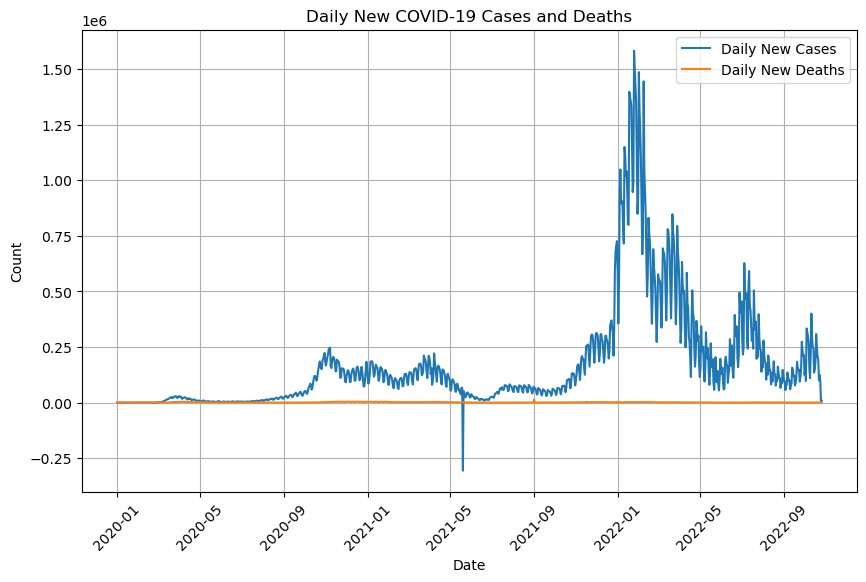

In [42]:
# Daily new cases and deaths-
daily_data = covid_data.resample('d', on='date').sum()

plt.figure(figsize=(10, 6))
plt.plot(daily_data.index, daily_data['cases'], label='Daily New Cases')
plt.plot(daily_data.index, daily_data['deaths'], label='Daily New Deaths')
plt.title('Daily New COVID-19 Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

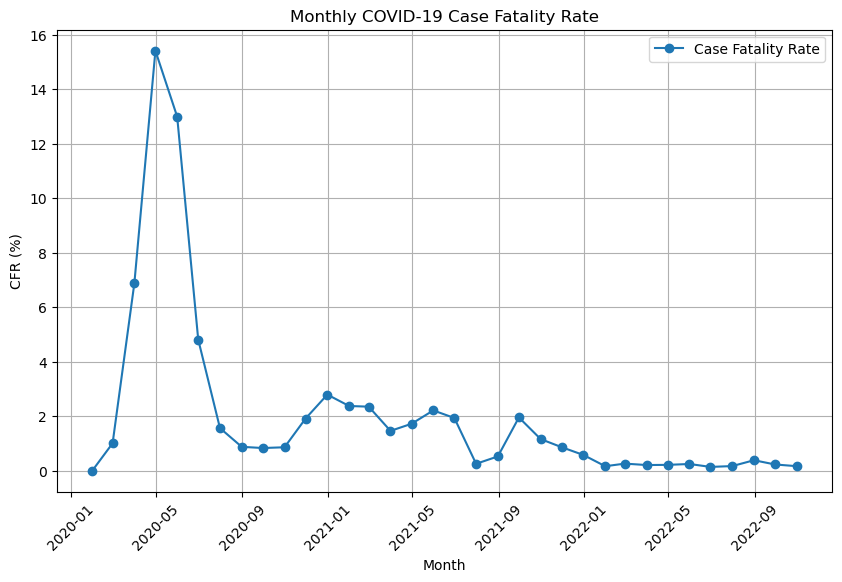

In [43]:
# Monthly Case Fatality Rate (CFR)
monthly_data['CFR'] = (monthly_data['deaths'] / monthly_data['cases']) * 100

plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['CFR'], label='Case Fatality Rate', marker='o')
plt.title('Monthly COVID-19 Case Fatality Rate')
plt.xlabel('Month')
plt.ylabel('CFR (%)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

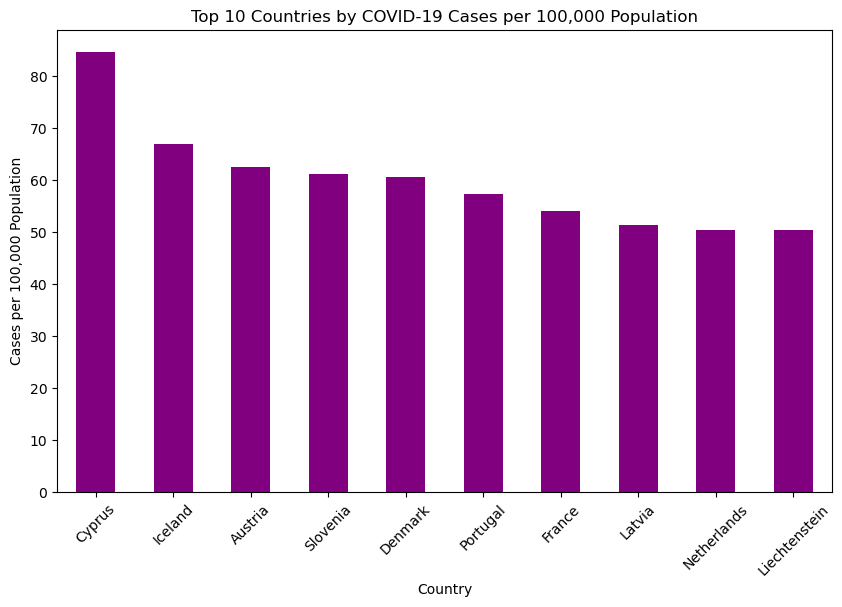

In [45]:
# Cases per 100,000 population by country
covid_data['Cases per 100k'] = (covid_data['cases'] / covid_data['popData2020']) * 100000
cases_per_100k = covid_data.groupby('countriesAndTerritories')['Cases per 100k'].mean().nlargest(10)

plt.figure(figsize=(10, 6))
cases_per_100k.plot(kind='bar', color='purple')
plt.title('Top 10 Countries by COVID-19 Cases per 100,000 Population')
plt.xlabel('Country')
plt.ylabel('Cases per 100,000 Population')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

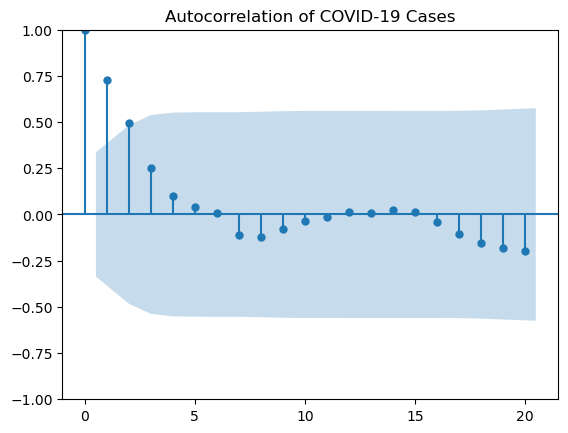

In [49]:
from statsmodels.graphics.tsaplots import plot_acf

# Autocorrelation plot
plt.figure(figsize=(10, 6))
plot_acf(monthly_data['cases'], lags=20)
plt.title('Autocorrelation of COVID-19 Cases')
plt.show()

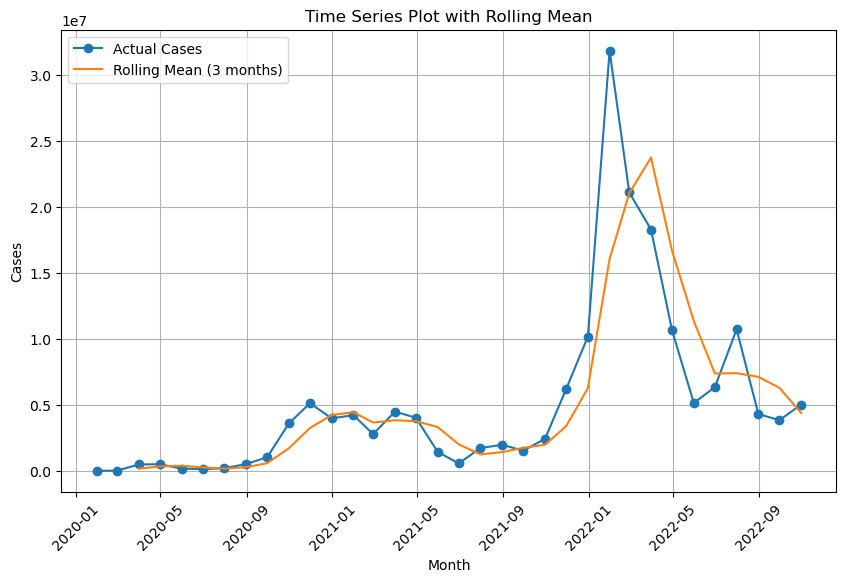

In [80]:
# Time series plot with rolling mean
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['cases'], label='Actual Cases', marker='o')
plt.plot(monthly_data.index, monthly_data['cases'].rolling(window=3).mean(), label='Rolling Mean (3 months)')
plt.title('Time Series Plot with Rolling Mean')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()